# Predicting the Status of Water Points in Tanzania
 **A data exploration and cleaning using the Tanzanian water point data set.**
 
### Overview
* Inital exploration
    * Exploring target variable
    * Most popular water structure to use
    * Water source with the most functioning water points
    * Quantity vs functionality
* Data cleaning
    * Filling in missing values
    * Dropping irrelevant/duplicate columns
    * Looking at outliers
    * Dealing with categorical columns
    * Normalize data
    
### Business Problem
Water is one of the few precious necessities in life, which is why it's best not to waste it. Everybody in the world deserves access to it, which is why the Ministry of Water and Irrigation is taking this opportunity to make sure that's possible. However, they need to know the status of the water points so they can better managed their time and send out the appropriate team. 

My project aims to predict the status of water points using the Tanzania dataset. 

# Import Data

In [1]:
import pandas as pd
import numpy as np

#visual libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#ability to see all columns up to 50
pd.set_option('display.max_columns', 50)

Here we can take a good look at our dependent variable. The waterpoints surrounding Tanzanian have been categorized into one of three classes: **'functional', 'non functional', and 'functional needs repair'.**

In [12]:
#dependent variable - holding three different classes: nonfunctional, functional, functional needs repair
target = pd.read_csv('../data/train_set_labels.csv')
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Here we have all the **independent variables** that contributes to the status of all the water points in Tanzanian. These variables can range from **numerical**(amount of water, price of water, population, etc), **clerical**(installer, management team, type of water, etc), and **geographical**(region code, village, and basin locations, etc). We have over 40 columns to observe and it's best to see which columns affects our dependent the most. There also seems to be columns that have the similar if not the same information. 

In [13]:
# Lets check our independent variables('..' goes back a directory)
value = pd.read_csv('../data/train_set_values.csv')
value.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [14]:
#Joining both target and value dataframe
df = pd.merge(target, value, on='id')
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


# EDA(The Vizs)

Plot a barplot that shows the count of the status_group. This graph helps us visualize how many water points are within each class. There are a lot of points in 'functional' and 'nonfunctional', but not many in 'functional needs repair'. This means there might some discrepancy in the data. Since there's a class imbalance I have a couple options:
* find a way to balance the classes
* merge the smaller class with one of the larger classes

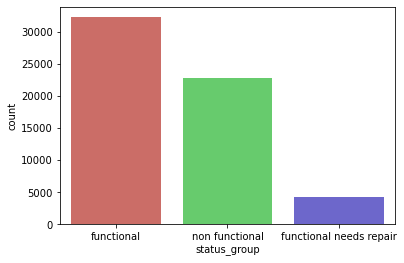

In [15]:
#count of the three classes of the dependent variable
sns.countplot(x='status_group', data=df, palette='hls')
plt.show()

In [16]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Great to see more functioning water points than the other. Enough data for the model to determine the best features to predict the business model. I'm thinking of combining non functional and functional needs repair columns. 

**Is there a type of water structure thats more popular?**

Text(0, 0.5, 'Counts of Type')

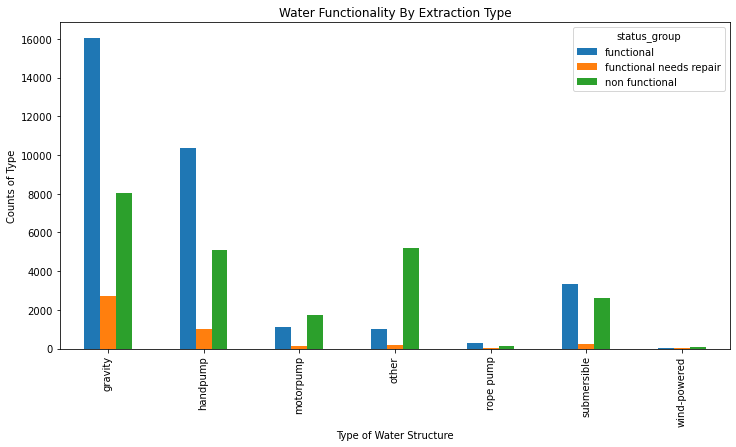

In [17]:
pd.crosstab(df.extraction_type_class,df.status_group).plot(kind='bar', figsize=(12, 6))
plt.title('Water Functionality By Extraction Type')
plt.xlabel('Type of Water Structure')
plt.ylabel('Counts of Type')

In [18]:
grav_dict = {}
functional = 16048
non_functional = 8031
functional_repair = 2701

for var in ['functional', 'non_functional', 'functional_repair']:
    grav_dict[var] = eval(var)

In [19]:
grav_dict

{'functional': 16048, 'non_functional': 8031, 'functional_repair': 2701}

In [20]:
for key, val in grav_dict.items():
    print(f'{key} percentage is: ', (val/59400) * 100)

functional percentage is:  27.016835016835017
non_functional percentage is:  13.52020202020202
functional_repair percentage is:  4.547138047138047


In [21]:
per_functional = (16048/26780) * 100
# per_non_functional
# per_functional_repair

The type of structure seems to be a good predictor for out target variable. Gravity type structures seems to be more popular, with wind-powered water points being the opposite. Aside from other types, <b>motor pump water points is the only structure that has more non functional water points then functional.</b>   

**What source of water have the most functional wells?**

Text(0, 0.5, 'Functionality')

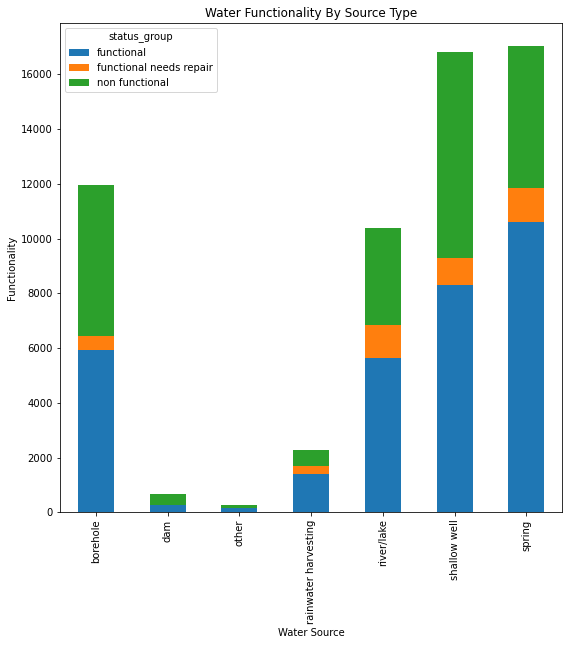

In [22]:
pd.crosstab(df.source_type,df.status_group).plot(kind='bar', stacked=True, figsize=(9,9))
plt.title('Water Functionality By Source Type')
plt.xlabel('Water Source')
plt.ylabel('Functionality')

Water Source looks like a good predictor for our target. <b>Shallow wells and springs are the most popular water source</b>, though spring water sources have more functional water points and less non functional. 

**Does the quantity of water affects the water points?**

Text(0, 0.5, 'No. of Waterpoints')

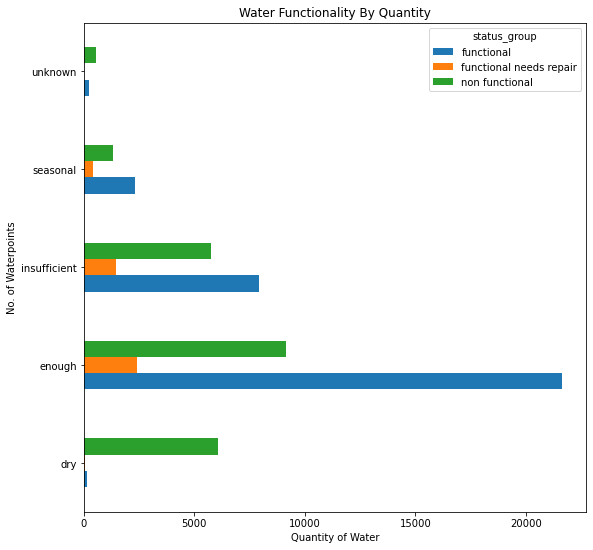

In [23]:
pd.crosstab(df.quantity,df.status_group).plot(kind='barh', stacked=False, figsize=(9,9))
plt.title('Water Functionality By Quantity')
plt.xlabel('Quantity of Water')
plt.ylabel('No. of Waterpoints')

Here we see that enough water is a great predictor for functional wells. Makes sense that dry well have more non functional wells because of the lack of water. That would be a great predictor for non functional wells.

**Plot a map that shows location and status_group maybe a scatterplot**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

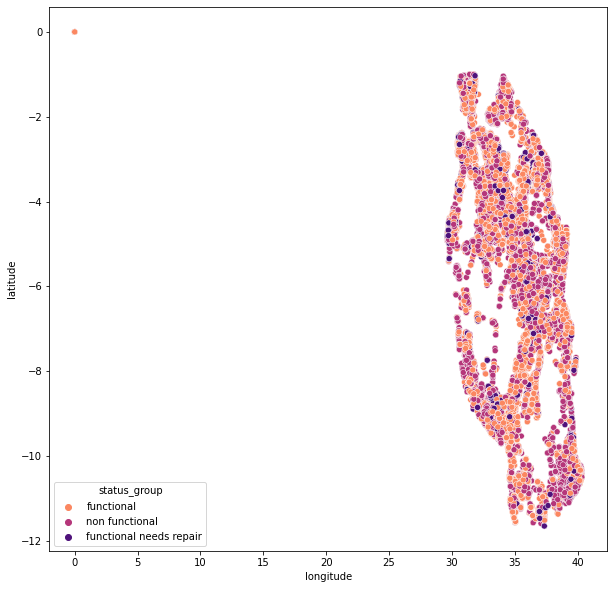

In [24]:
plt.figure(figsize=[10,10])
sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=df, palette='magma_r')

Here you can see some outliers in longitude and latitude that needs to be fixed. Looks like there's almost a good mixture of functional and non functional water points, which will help with out model later on. Since there's a small amount of functional needs repair, I think it's best to merge that with non functional.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

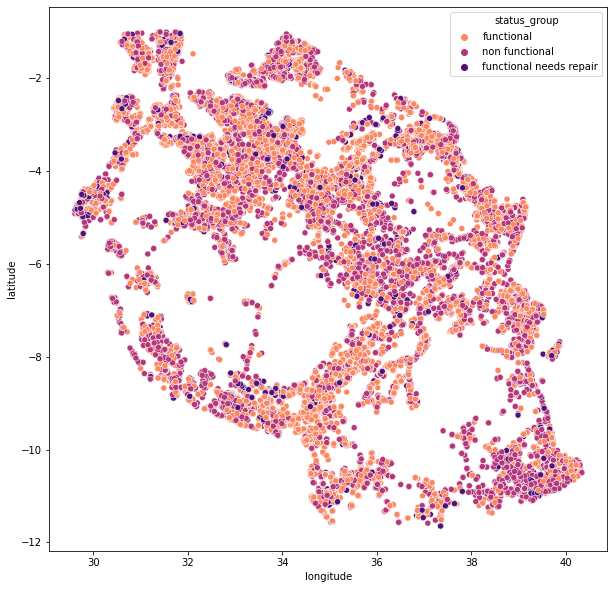

In [25]:
# without outliers
df2 = df[df.longitude > 0]
plt.figure(figsize=[10,10])
sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=df2, palette='magma_r')

# import plotly.express as px
# fig = px.scatter_mapbox(df2, lat='latitude', lon='longitude', color='status_group', opacity=1)
# fig.update_layout(mapbox_style='stamen-terrain')
# fig.show()

With the outliers gone you can see a better look at the area. There seems to be a cluster of non functional water points in the southeast region of the map. 

# Cleaning

In [26]:
for col in df:
    print(col)
    print(df[col].value_counts(normalize=True))
    print('-------------------------------')

id
2047     0.000017
72310    0.000017
49805    0.000017
51852    0.000017
62091    0.000017
           ...   
46396    0.000017
36155    0.000017
34106    0.000017
38200    0.000017
0        0.000017
Name: id, Length: 59400, dtype: float64
-------------------------------
status_group
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64
-------------------------------
amount_tsh
0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64
-------------------------------
date_recorded
2011-03-15    0.009630
2011-03-17    0.009394
2013-02-03    0.009192
2011-03-14    0.008754
2011-03-16    0.008636
                ...   
2002-10-14    0.000017
2011-09-21    0.000017
2011-09-14    0.000017

Name: scheme_name, Length: 2696, dtype: float64
-------------------------------
permit
True     0.68955
False    0.31045
Name: permit, dtype: float64
-------------------------------
construction_year
0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1

<b>OBSERVATION</b>
There are some columns that have a lot of zeros like amount_tsh and some columns with weird names like 'other' and 'none' that needs to be dealt with.

In [27]:
# make a copy to keep original dataframe
df_1 = df.copy()

In [28]:
df_1

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


## Missing Longitudes

In the hopes of keeping as much information as I could. I used geocoder to find all the missing locations in the dataframe. This work is located in another jupyter notebook. 

In [29]:
# pull out the rows with zero in longitude column
df_1[df_1.longitude == 0.0]

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
21,6091,functional,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump
53,32376,non functional,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
168,72678,functional,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
177,56725,non functional,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
253,13042,functional needs repair,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,functional needs repair,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
59208,3631,functional,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
59295,60843,functional needs repair,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
59324,748,functional,0.0,2013-01-22,World Vision,0,World Vision,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [31]:
# download missing longitudes from csv file
df_loc = pd.read_csv('../data/location_found.csv')
df_loc.head()

,Unnamed: 0,index,id,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,latitude,longitude
0,0,21,6091,0.0,2013-02-10,Dwsp,0,DWE,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,-2.672696,34.435504
1,1,53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,-2.326078,31.858254
2,2,168,72678,0.0,2013-01-30,Wvt,0,WVT,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,-2.672696,34.435504
3,3,177,56725,0.0,2013-01-17,Netherlands,0,DWE,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,-2.672696,34.435504
4,4,253,13042,0.0,2012-10-29,Hesawa,0,DWE,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,-17.809217,-63.338761


In [32]:
# dataframe of the columns I need
loc_main = df_loc[['index', 'id', 'latitude', 'longitude']]
loc_main

,index,id,latitude,longitude
0,21,6091,-2.672696,34.435504
1,53,32376,-2.326078,31.858254
2,168,72678,-2.672696,34.435504
3,177,56725,-2.672696,34.435504
4,253,13042,-17.809217,-63.338761
...,...,...,...,...
1807,59189,62177,-2.672696,34.435504
1808,59208,3631,-2.672696,34.435504
1809,59295,60843,-2.672696,34.435504
1810,59324,748,-2.672696,34.435504


In [33]:
#reset the dataframes to have the same column as the index
df_1 = df_1.set_index('id')
loc_main = loc_main.set_index('id')

In [34]:
# update the missing values with the new values
df_1.update(loc_main)
df_1.reset_index(inplace=True)

In [35]:
# checking one of the missing values
df_1[df_1['id'] == 62177] 

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59189,62177,functional needs repair,0.0,2011-07-18,Dwsp,0,DWE,34.435504,-2.672696,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


## Dealing with missing info

In [36]:
df_1.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [37]:
# df_1.construction_year = df_1.construction_year.replace(np.NaN, 0)
val = np.random.choice(df_1.loc[df_1.construction_year.values >= 1, 'construction_year'])
df_1.loc[df_1.construction_year == 0, 'construction_year'] = val
df_1.construction_year.unique()

array([1999, 2010, 2009, 1986, 2008, 2011, 1987, 1991, 1978, 1992, 1974,
       2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970, 1995,
       2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990, 1982,
       1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994, 1968,
       1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965],
      dtype=int64)

In [38]:
gps_mean = df_1.gps_height.mean()
df_1.gps_height = df_1.gps_height.map(lambda x: gps_mean if x == 0.0 else x)

amount_mean = df_1.amount_tsh.mean()
df_1.amount_tsh = df_1.amount_tsh.map(lambda x: amount_mean if x <= 50.0 else x)

pop_mean = df_1.population.mean()
df_1.population = df_1.population.map(lambda x: pop_mean if x == 0.0 else x)

What to do with the weird datatypes?
* status_group: Our target variables needs to be change to an integer.
* basin, region, scheme_management, extraction_type_class, management_group, quality_group, quantity, source_type, and waterpoint_type_group will be turned into dummies.
* public_meeting, permit, and payment can be map to a simple yes or no.

In [39]:
# replace missing values that are coded differently with NaNs.
df_1 = df_1.replace('none', np.NaN)
df_1 = df_1.replace('unknown', np.NaN)
df_1 = df_1.replace('other', np.NaN)
df_1 = df_1.replace('Other', np.NaN)
df_1 = df_1.replace('None', np.NaN)

#replace zeros
df_1 = df_1.replace('0', np.NaN)

In [40]:
# change to boolean 0 - doesn't have, 1- do have
# df_1.amount_tsh = df_1.amount_tsh.map(lambda x: 1 if x >= 1 else 0)

# df_1.population = df_1.population.map(lambda x: 1 if x >= 1 else 0)

df_1.public_meeting = df_1.public_meeting.replace(np.NaN, 0)
df_1.public_meeting = df_1.public_meeting.astype(float)
df_1.public_meeting = df_1.public_meeting.map(lambda x: 1 if int(x) == 1 else 0)

df_1.permit = df_1.permit.replace(np.NaN, 0)
df_1.permit = df_1.permit.map(lambda x: 1 if int(x) == 1 else 0)

df_1.num_private = df_1.num_private.map(lambda x: 0 if x == 0.0 else 1)

df_1.payment = df_1.payment.map(lambda x: 0 if x == 'never pay' else 1)

## Drop irrelevent columns
**Get rid of columns with irrelevent info and redundant info.**

In [41]:
cols_to_delete = ['date_recorded', 'funder', 'installer', 'wpt_name', 'region_code', 
                  'ward', 'recorded_by', 'scheme_name', 'extraction_type', 'extraction_type_group', 
                  'management', 'payment_type', 'water_quality', 'quantity_group', 
                  'source', 'source_class', 'waterpoint_type', 'subvillage']

df_1 = df_1.drop(cols_to_delete, axis=1)

In [42]:
# drop rows with missing info
df_1 = df_1.dropna()

In [43]:
# about 22% of data lost
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46624 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     46624 non-null  int64  
 1   status_group           46624 non-null  object 
 2   amount_tsh             46624 non-null  float64
 3   gps_height             46624 non-null  float64
 4   longitude              46624 non-null  float64
 5   latitude               46624 non-null  float64
 6   num_private            46624 non-null  int64  
 7   basin                  46624 non-null  object 
 8   region                 46624 non-null  object 
 9   district_code          46624 non-null  int64  
 10  lga                    46624 non-null  object 
 11  population             46624 non-null  float64
 12  public_meeting         46624 non-null  int64  
 13  scheme_management      46624 non-null  object 
 14  permit                 46624 non-null  int64  
 15  co

In [44]:
df_1.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,public_meeting,permit,construction_year,payment
count,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000
mean,37176.287427,625.593241,931.479159,34.757963,-5.963127,0.013984,5.426304,232.131547,0.881863,0.653741,2001.239576,0.604946
std,21442.573086,3336.589622,526.045744,6.530178,2.896901,0.117426,9.162814,424.832299,0.322773,0.475782,10.990245,0.488868
min,0.000000,59.000000,-90.000000,-63.338761,-17.809217,0.000000,0.000000,1.000000,0.000000,0.000000,1960.000000,0.000000
25%,18591.750000,317.650385,668.297239,33.449716,-8.784287,0.000000,2.000000,96.000000,1.000000,0.000000,1997.000000,0.000000
50%,37128.500000,317.650385,668.297239,34.951404,-5.235508,0.000000,3.000000,179.909983,1.000000,1.000000,2008.000000,1.000000
75%,55729.250000,317.650385,1350.000000,37.136582,-3.353600,0.000000,5.000000,200.000000,1.000000,1.000000,2008.000000,1.000000
max,74246.000000,350000.000000,2770.000000,40.323402,-0.998916,1.000000,80.000000,30500.000000,1.000000,1.000000,2013.000000,1.000000


In [45]:
# let's take a look at our target
df_1.status_group.value_counts(normalize=True)

functional                 0.608635
non functional             0.311556
functional needs repair    0.079809
Name: status_group, dtype: float64

In [46]:
df_1.rename(columns={'status_group':'target'}, inplace=True)

In [47]:
# For classification modeling to work we need to turn status_group(target variable) to integers. 
df_1 = df_1.replace({'target': {'functional' : 1, 'non functional' : 0, 
                                'functional needs repair' : 0}})

In [48]:
df_1.target.value_counts(normalize=True)

1    0.608635
0    0.391365
Name: target, dtype: float64

## Outliers

**For now the best bet is to get rid of the outliers below 0**

<AxesSubplot:xlabel='longitude'>

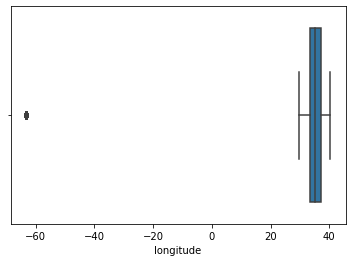

In [49]:
sns.boxplot(x=df_1['longitude'])

In [50]:
df_1 = df_1[df_1.longitude > 0.0]
df_1

,id,target,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source_type,waterpoint_type_group
0,69572,1,6000.000000,1390.000000,34.938093,-9.856322,0,Lake Nyasa,Iringa,5,Ludewa,109.000000,1,VWC,0,1999,gravity,user-group,1,good,enough,spring,communal standpipe
2,34310,1,317.650385,686.000000,37.460664,-3.821329,0,Pangani,Manyara,4,Simanjiro,250.000000,1,VWC,1,2009,gravity,user-group,1,good,enough,dam,communal standpipe
3,67743,0,317.650385,263.000000,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58.000000,1,VWC,1,1986,submersible,user-group,0,good,dry,borehole,communal standpipe
6,19816,0,317.650385,668.297239,33.362410,-3.766365,0,Internal,Shinyanga,3,Shinyanga Rural,179.909983,1,VWC,1,2008,handpump,user-group,0,good,enough,borehole,hand pump
8,53934,0,317.650385,668.297239,32.711100,-5.146712,0,Lake Tanganyika,Tabora,6,Tabora Urban,179.909983,1,VWC,1,2008,handpump,user-group,0,salty,seasonal,borehole,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,1,317.650385,1210.000000,37.169807,-3.253847,0,Pangani,Kilimanjaro,5,Hai,125.000000,1,Water Board,1,1999,gravity,user-group,1,good,enough,spring,communal standpipe
59396,27263,1,4700.000000,1212.000000,35.249991,-9.070629,0,Rufiji,Iringa,4,Njombe,56.000000,1,VWC,1,1996,gravity,user-group,1,good,enough,river/lake,communal standpipe
59397,37057,1,317.650385,668.297239,34.017087,-8.750434,0,Rufiji,Mbeya,7,Mbarali,179.909983,1,VWC,0,2008,handpump,user-group,1,fluoride,enough,borehole,hand pump
59398,31282,1,317.650385,668.297239,35.861315,-6.378573,0,Rufiji,Dodoma,4,Chamwino,179.909983,1,VWC,1,2008,handpump,user-group,0,good,insufficient,shallow well,hand pump


<AxesSubplot:xlabel='population'>

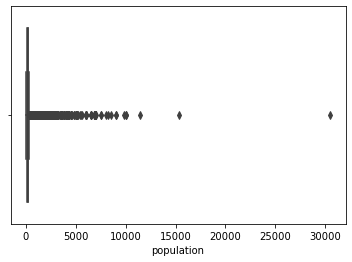

In [51]:
sns.boxplot(x=df_1['population'])

In [52]:
df_1 = df_1[df_1.population < df_1.population.std()]
df_1

,id,target,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source_type,waterpoint_type_group
0,69572,1,6000.000000,1390.000000,34.938093,-9.856322,0,Lake Nyasa,Iringa,5,Ludewa,109.000000,1,VWC,0,1999,gravity,user-group,1,good,enough,spring,communal standpipe
2,34310,1,317.650385,686.000000,37.460664,-3.821329,0,Pangani,Manyara,4,Simanjiro,250.000000,1,VWC,1,2009,gravity,user-group,1,good,enough,dam,communal standpipe
3,67743,0,317.650385,263.000000,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58.000000,1,VWC,1,1986,submersible,user-group,0,good,dry,borehole,communal standpipe
6,19816,0,317.650385,668.297239,33.362410,-3.766365,0,Internal,Shinyanga,3,Shinyanga Rural,179.909983,1,VWC,1,2008,handpump,user-group,0,good,enough,borehole,hand pump
8,53934,0,317.650385,668.297239,32.711100,-5.146712,0,Lake Tanganyika,Tabora,6,Tabora Urban,179.909983,1,VWC,1,2008,handpump,user-group,0,salty,seasonal,borehole,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,1,317.650385,1210.000000,37.169807,-3.253847,0,Pangani,Kilimanjaro,5,Hai,125.000000,1,Water Board,1,1999,gravity,user-group,1,good,enough,spring,communal standpipe
59396,27263,1,4700.000000,1212.000000,35.249991,-9.070629,0,Rufiji,Iringa,4,Njombe,56.000000,1,VWC,1,1996,gravity,user-group,1,good,enough,river/lake,communal standpipe
59397,37057,1,317.650385,668.297239,34.017087,-8.750434,0,Rufiji,Mbeya,7,Mbarali,179.909983,1,VWC,0,2008,handpump,user-group,1,fluoride,enough,borehole,hand pump
59398,31282,1,317.650385,668.297239,35.861315,-6.378573,0,Rufiji,Dodoma,4,Chamwino,179.909983,1,VWC,1,2008,handpump,user-group,0,good,insufficient,shallow well,hand pump


<AxesSubplot:xlabel='amount_tsh'>

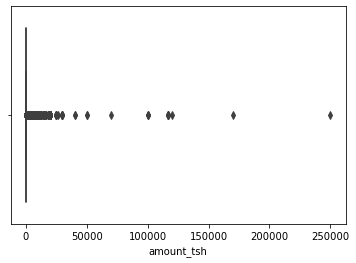

In [53]:
sns.boxplot(x=df_1['amount_tsh'])

In [54]:
df_1 = df_1[df_1.amount_tsh < df_1.amount_tsh.std()]
df_1

,id,target,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source_type,waterpoint_type_group
2,34310,1,317.650385,686.000000,37.460664,-3.821329,0,Pangani,Manyara,4,Simanjiro,250.000000,1,VWC,1,2009,gravity,user-group,1,good,enough,dam,communal standpipe
3,67743,0,317.650385,263.000000,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58.000000,1,VWC,1,1986,submersible,user-group,0,good,dry,borehole,communal standpipe
6,19816,0,317.650385,668.297239,33.362410,-3.766365,0,Internal,Shinyanga,3,Shinyanga Rural,179.909983,1,VWC,1,2008,handpump,user-group,0,good,enough,borehole,hand pump
8,53934,0,317.650385,668.297239,32.711100,-5.146712,0,Lake Tanganyika,Tabora,6,Tabora Urban,179.909983,1,VWC,1,2008,handpump,user-group,0,salty,seasonal,borehole,hand pump
11,50409,1,200.000000,1062.000000,35.770258,-10.574175,0,Lake Nyasa,Ruvuma,5,Namtumbo,250.000000,1,WUG,0,1987,handpump,user-group,1,good,insufficient,shallow well,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,11164,0,500.000000,351.000000,37.634053,-6.124830,0,Wami / Ruvu,Morogoro,6,Mvomero,89.000000,1,VWC,1,2007,submersible,user-group,1,good,enough,borehole,communal standpipe
59395,60739,1,317.650385,1210.000000,37.169807,-3.253847,0,Pangani,Kilimanjaro,5,Hai,125.000000,1,Water Board,1,1999,gravity,user-group,1,good,enough,spring,communal standpipe
59397,37057,1,317.650385,668.297239,34.017087,-8.750434,0,Rufiji,Mbeya,7,Mbarali,179.909983,1,VWC,0,2008,handpump,user-group,1,fluoride,enough,borehole,hand pump
59398,31282,1,317.650385,668.297239,35.861315,-6.378573,0,Rufiji,Dodoma,4,Chamwino,179.909983,1,VWC,1,2008,handpump,user-group,0,good,insufficient,shallow well,hand pump


# Dealing with Categorical data

In [55]:
# bin region into zones
df_1 = df_1.replace({'region': {'Morogoro':'coastal', 'Pwani':'coastal', 'Tanga':'coastal', 
                                'Dar es Salaam':'coastal', 'Shinyanga':'lake', 'Kagera':'lake', 
                                'Kigoma':'lake','Mwanza':'lake', 'Tabora':'lake', 'Mara':'lake', 
                                'Kilimanjaro':'north_highland', 'Arusha':'north_highland', 
                                'Manyara':'north_highland', 'Dodoma':'central', 'Singida':'central',
                                'Iringa':'south_highland', 'Mbeya':'south_highland', 'Rukwa':'south_highland', 
                                'Ruvuma':'southern', 'Mtwara':'southern', 'Lindi':'southern'}})

df_1.to_csv('cleaned_data.csv')

Text(0, 0.5, 'Counts of Wells')

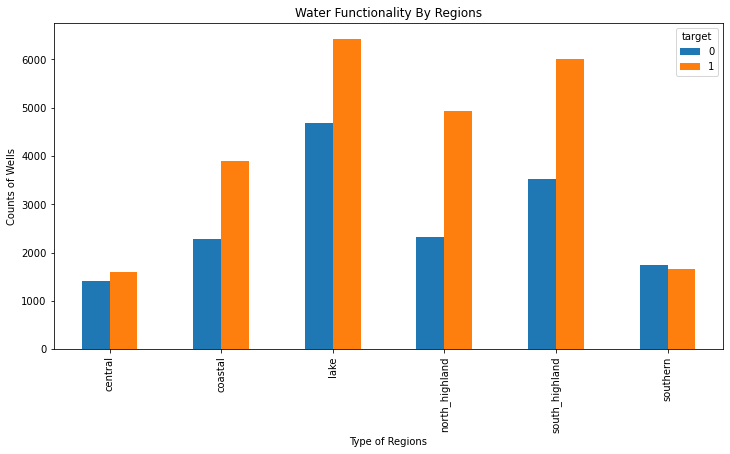

In [56]:
pd.crosstab(df_1.region,df_1.target).plot(kind='bar', figsize=(12, 6))
plt.title('Water Functionality By Regions')
plt.xlabel('Type of Regions')
plt.ylabel('Counts of Wells')

In [57]:
df_main = pd.get_dummies(df_1, drop_first=True)
df_main

,id,target,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,public_meeting,permit,construction_year,payment,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_coastal,region_lake,region_north_highland,region_south_highland,...,scheme_management_Water Board,scheme_management_Water authority,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_parastatal,management_group_user-group,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quantity_enough,quantity_insufficient,quantity_seasonal,source_type_dam,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring
2,34310,1,317.650385,686.000000,37.460664,-3.821329,0,4,250.000000,1,1,2009,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,67743,0,317.650385,263.000000,38.486161,-11.155298,0,63,58.000000,1,1,1986,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,19816,0,317.650385,668.297239,33.362410,-3.766365,0,3,179.909983,1,1,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,53934,0,317.650385,668.297239,32.711100,-5.146712,0,6,179.909983,1,1,2008,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
11,50409,1,200.000000,1062.000000,35.770258,-10.574175,0,5,250.000000,1,0,1987,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,11164,0,500.000000,351.000000,37.634053,-6.124830,0,6,89.000000,1,1,2007,1,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
59395,60739,1,317.650385,1210.000000,37.169807,-3.253847,0,5,125.000000,1,1,1999,1,0,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0
59397,37057,1,317.650385,668.297239,34.017087,-8.750434,0,7,179.909983,1,0,2008,1,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
59398,31282,1,317.650385,668.297239,35.861315,-6.378573,0,4,179.909983,1,1,2008,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [58]:
pd.set_option('display.max_columns', 300)
df_main.head()

,id,target,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,public_meeting,permit,construction_year,payment,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_coastal,region_lake,region_north_highland,region_south_highland,region_southern,lga_Arusha Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_parastatal,management_group_user-group,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quantity_enough,quantity_insufficient,quantity_seasonal,source_type_dam,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring
2,34310,1,317.650385,686.000000,37.460664,-3.821329,0,4,250.000000,1,1,2009,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,67743,0,317.650385,263.000000,38.486161,-11.155298,0,63,58.000000,1,1,1986,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,19816,0,317.650385,668.297239,33.362410,-3.766365,0,3,179.909983,1,1,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0

In [59]:
df_main.columns = df_main.columns.str.replace('scheme_management','sm').str.replace('extraction_type_class','et').str.replace(
    'management_group','mg').str.replace('quality_group','quality').str.replace('source_type','source').str.replace(
    'waterpoint_type_group','wp_type').str.replace('other -','').str.replace('other ', '').str.replace(' / ',' ').str.replace('/',' ').str.replace(' ','_').str.replace('-','_')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40495 entries, 2 to 59399
Columns: 181 entries, id to wp_type_improved_spring
dtypes: float64(5), int64(8), uint8(168)
memory usage: 10.8 MB


## Normalize Continuous Data

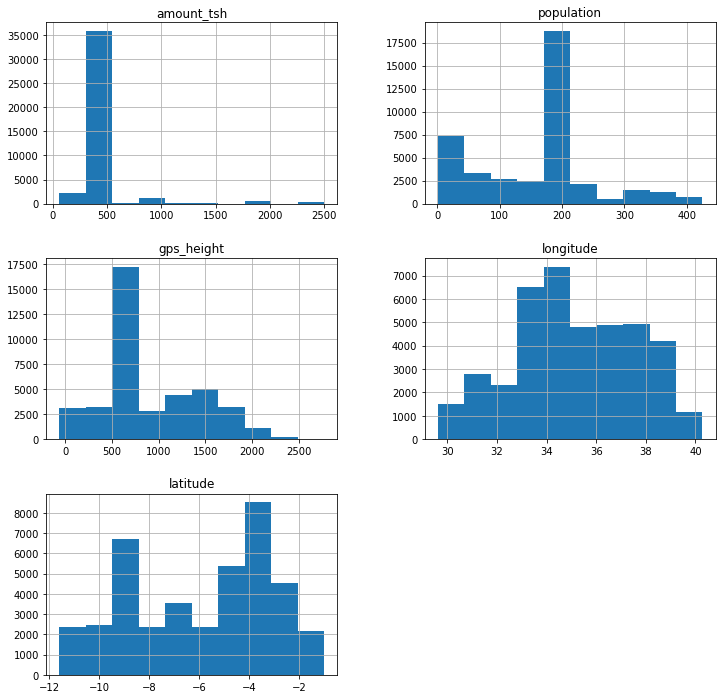

In [60]:
df_main[['amount_tsh', 'population', 'gps_height', 'longitude', 'latitude']].hist(figsize=(12,12));

In [61]:

normalize = df_main[['amount_tsh', 'population', 'gps_height', 'longitude', 'latitude']]


scaler = MinMaxScaler(feature_range=(0, 1))
for col in normalize:
    rescaledX = scaler.fit_transform(df_main[[col]])
    df_main[col] = rescaledX

**After normalizing our continuous variables we can see that our distribution looks a bit better. The essence is to make the model generalize properly with any bias of skewed values.**

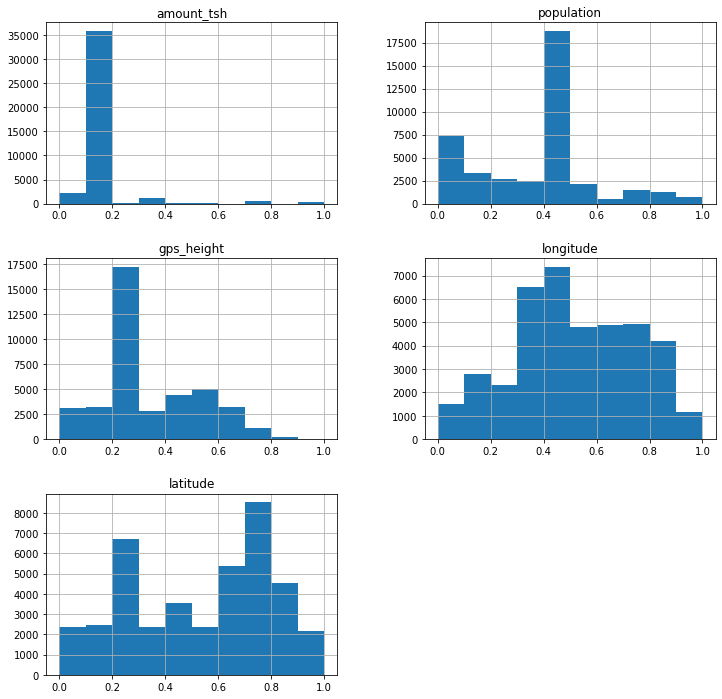

In [62]:
df_main[['amount_tsh', 'population', 'gps_height', 'longitude', 'latitude']].hist(figsize=(12,12));

In [63]:
df_main = df_main.drop('id', axis=1)
df_main

,target,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,public_meeting,permit,construction_year,payment,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_Southern_Coast,basin_Wami_Ruvu,region_coastal,region_lake,region_north_highland,region_south_highland,region_southern,lga_Arusha_Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba_Rural,lga_Bukoba_Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma_Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa_Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma_Rural,lga_Kigoma_Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi_Rural,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya_Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro_Rural,lga_Morogoro_Urban,lga_Moshi_Rural,lga_Moshi_Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara_Rural,lga_Mtwara_Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma_Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga_Rural,lga_Shinyanga_Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida_Rural,lga_Singida_Urban,lga_Songea_Rural,lga_Songea_Urban,lga_Sumbawanga_Rural,lga_Sumbawanga_Urban,lga_Tabora_Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,sm_Parastatal,sm_Private_operator,sm_SWC,sm_Trust,sm_VWC,sm_WUA,sm_WUG,sm_Water_Board,sm_Water_authority,et_handpump,et_motorpump,et_rope_pump,et_submersible,et_wind_powered,mg_parastatal,mg_user_group,quality_fluoride,quality_good,quality_milky,quality_salty,quantity_enough,quantity_insufficient,quantity_seasonal,source_dam,source_rainwater_harvesting,source_river_lake,source_shallow_well,source_spring,wp_type_communal_standpipe,wp_type_dam,wp_type_hand_pump,wp_type_improved_spring
2,1,0.105961,0.264384,0.735732,0.733417,0,4,0.587264,1,1,2009,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,0,0.105961,0.115072,0.831861,0.040709,0,63,0.134434,1,1,1986,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0.105961,0.258135,0.351565,0.738609,0,3,0.421958,1,1,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,0,0.105961,0.258135,0.290512,0.608232,0,6,0.421958,1,1,2008,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0

In [64]:
df_main.to_csv('cleaned_status_data.csv')